# Stock Trading Nasdaq Project - Team 3

### Brief Introduction
The primary objective of this project is to perform a comprehensive analysis of stock market data for companies listed on the Nasdaq stock exchange. We selected seven companies, namely, Apple, Atlassian, Facebook, Google, Microsoft, MicroStrategy Incorporated and Monday and used their stock data of the past year for our analysis. 

### Methods 
We used csv files obtained from the Nasdaq API, xxxxx, data visualization techniques. 
### Conclusions
From our analysis we would recommend the following: 

In [32]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import nasdaqdatalink

## Data Collection

### Method 1: In case of paid membership with Nasdaq datsource. Use method 2 (see below) in case of free membership. 

In [33]:
# Use Pandas Nasdaq Data Link to get stock data

GOOG_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['GOOG'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(GOOG_stock)} rows of data.")

# Display sample data
#GOOG_stock.head()

Downloaded 0 rows of data.


In [34]:
# Use Pandas Nasdaq Data Link to get stock data

META_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['META'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(META_stock)} rows of data.")

# Display sample data
#META_stock.head()

Downloaded 0 rows of data.


In [35]:
# Use Pandas Nasdaq Data Link to get stock data

MSFT_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['MSFT'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(MSFT_stock)} rows of data.")

# Display sample data
#MSFT_stock.head()

Downloaded 0 rows of data.


In [36]:
# Use Pandas Nasdaq Data Link to get stock data

MSTR_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['MSTR'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(MSTR_stock)} rows of data.")

# Display sample data
#MSTR_stock.head()

Downloaded 0 rows of data.


In [37]:
# Use Pandas Nasdaq Data Link to get stock data

AAPL_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['AAPL'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(AAPL_stock)} rows of data.")

# Display sample data
#AAPL_stock.head()

Downloaded 0 rows of data.


In [38]:
# Use Pandas Nasdaq Data Link to get stock data

MNDY_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['MNDY'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(MNDY_stock)} rows of data.")

# Display sample data
#MNDY_stock.head()

Downloaded 0 rows of data.


In [39]:
# Use Pandas Nasdaq Data Link to get stock data

TEAM_stock = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES', 
                                qopts = { 'columns': ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'] }, 
                                ticker = ['TEAM'], 
                                date = { 'gte': '2023-04-01', 'lte': '2024-04-01' })

print(f"Downloaded {len(TEAM_stock)} rows of data.")


# Display sample data
#TEAM_stock.head()

Downloaded 0 rows of data.


### Method 2: In case of free membership wirh Nasdaq datasource, use csv files stored in Resources folder:

In [40]:

#Define path to obtain files
GOOG_stock = Path("./Resources/GOOG_stock.csv")
META_stock = Path("./Resources/META_stock.csv")
MSFT_stock = Path("./Resources/MSFT_stock.csv")
MNDY_stock = Path("./Resources/MNDY_stock.csv")
AAPL_stock = Path("./Resources/AAPL_stock.csv")
MSTR_stock = Path("./Resources/MSTR_stock.csv")
TEAM_stock = Path("./Resources/TEAM_stock.csv")

#Read the csv file
GOOG_stock_df = pd.read_csv(GOOG_stock)
print(f"Google dataframe head is: {GOOG_stock_df.head()}")


META_stock_df = pd.read_csv(META_stock)
print(f"META dataframe head is: {META_stock_df.head()}")

MSFT_stock_df = pd.read_csv(MSFT_stock)
print(f"MSFT dataframe head is: {MSFT_stock_df.head()}")


MNDY_stock_df = pd.read_csv(MNDY_stock)
print(f"MONDAY dataframe head is: {MNDY_stock_df.head()}")

AAPL_stock_df = pd.read_csv(AAPL_stock)
print(f"AAPL dataframe head is: {AAPL_stock_df.head()}")

MSTR_stock_df = pd.read_csv(MSTR_stock)
print(f"MSTR dataframe head is: {MSTR_stock_df.head()}")


TEAM_stock_df = pd.read_csv(TEAM_stock)
print(f"TEAM dataframe head is: {TEAM_stock_df.head()}")

Google dataframe head is:    Unnamed: 0  None ticker        date    open    high       low   close  \
0           0   249   GOOG  2023-04-03  102.67  104.95  102.3800  104.91   
1           1   248   GOOG  2023-04-04  104.84  106.10  104.6000  105.12   
2           2   247   GOOG  2023-04-05  106.12  106.54  104.1021  104.95   
3           3   246   GOOG  2023-04-06  105.77  109.63  104.8150  108.90   
4           4   245   GOOG  2023-04-10  107.39  107.97  105.6000  106.95   

       volume  
0  20644485.0  
1  20299970.0  
2  21796705.0  
3  34565375.0  
4  19678585.0  
META dataframe head is:    Unnamed: 0  None ticker        date    open      high     low   close  \
0           0   249   META  2023-04-03  208.84  213.4861  208.20  213.07   
1           1   248   META  2023-04-04  213.39  216.2400  212.54  214.72   
2           2   247   META  2023-04-05  214.15  215.1900  209.94  211.48   
3           3   246   META  2023-04-06  209.25  216.9400  208.65  216.10   
4           4   2

## Data Cleaning

In [41]:
#Change Date Order
GOOG_date = GOOG_stock_df.sort_values(by="date").reset_index()
META_date = META_stock_df.sort_values(by="date").reset_index()
MSFT_date = MSFT_stock_df.sort_values(by="date").reset_index()
MSTR_date = MSTR_stock_df.sort_values(by="date").reset_index()
AAPL_date = AAPL_stock_df.sort_values(by="date").reset_index()
MNDY_date = MNDY_stock_df.sort_values(by="date").reset_index()
TEAM_date = TEAM_stock_df.sort_values(by="date").reset_index()

In [42]:
GOOG_date.head()

,index,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,0,249,GOOG,2023-04-03,102.67,104.95,102.3800,104.91,20644485.0
1,1,1,248,GOOG,2023-04-04,104.84,106.10,104.6000,105.12,20299970.0
2,2,2,247,GOOG,2023-04-05,106.12,106.54,104.1021,104.95,21796705.0
3,3,3,246,GOOG,2023-04-06,105.77,109.63,104.8150,108.90,34565375.0
4,4,4,245,GOOG,2023-04-10,107.39,107.97,105.6000,106.95,19678585.0


In [43]:
# Export the Data into a csv
GOOG_date.to_csv("output_data/GOOG_stock.csv")
META_date.to_csv("output_data/META_stock.csv")
MSFT_date.to_csv("output_data/MSFT_stock.csv")
MSTR_date.to_csv("output_data/MSTR_stock.csv")
AAPL_date.to_csv("output_data/AAPL_stock.csv")
MNDY_date.to_csv("output_data/MNDY_stock.csv")
TEAM_date.to_csv("output_data/TEAM_stock.csv")

In [44]:
GOOG_data = "output_data/GOOG_stock.csv"
META_data = "output_data/META_stock.csv"
MSFT_data = "output_data/MSFT_stock.csv"
MSTR_data = "output_data/MSTR_stock.csv"
AAPL_data = "output_data/AAPL_stock.csv"
MNDY_data = "output_data/MNDY_stock.csv"
TEAM_data = "output_data/TEAM_stock.csv"

GOOG_data = pd.read_csv(GOOG_data)
META_data = pd.read_csv(META_data)
MSFT_data = pd.read_csv(MSFT_data)
MSTR_data = pd.read_csv(MSTR_data)
AAPL_data = pd.read_csv(AAPL_data)
MNDY_data = pd.read_csv(MNDY_data)
TEAM_data = pd.read_csv(TEAM_data)

#Print sample data:
GOOG_data.head()

,Unnamed: 0.1,index,Unnamed: 0,None,ticker,date,open,high,low,close,volume
0,0,0,0,249,GOOG,2023-04-03,102.67,104.95,102.3800,104.91,20644485.0
1,1,1,1,248,GOOG,2023-04-04,104.84,106.10,104.6000,105.12,20299970.0
2,2,2,2,247,GOOG,2023-04-05,106.12,106.54,104.1021,104.95,21796705.0
3,3,3,3,246,GOOG,2023-04-06,105.77,109.63,104.8150,108.90,34565375.0
4,4,4,4,245,GOOG,2023-04-10,107.39,107.97,105.6000,106.95,19678585.0


## Analysis Part I: Visualising our data and getting summary stats

In [45]:
#Define the Company Names and Lists for Project
GOOG = GOOG_data
META = META_data
MSFT = MSFT_data
MSTR = MSTR_data
AAPL = AAPL_data
MNDY = MNDY_data
TEAM = TEAM_data

company_list = [GOOG, META, MSFT, MSTR, AAPL, MNDY, TEAM]
company_name = ['GOOG', 'META', 'MSFT','MSTR', 'AAPL', 'MNDY', 'TEAM']

In [48]:
#Summary stats
aggregate = data_boxplot.aggregate([st.mean, st.median, st.variance, st.stdev])
aggregate

,GOOG,META,MSFT,MSTR,AAPL,MNDY,TEAM
mean,131.511420,329.996540,351.165940,518.510980,181.003000,172.628800,191.009080
median,133.235000,311.715000,337.855000,407.520000,180.730000,172.535000,190.610000
variance,148.137678,6359.356429,1489.332890,117372.845809,83.995385,895.243658,711.834533
stdev,12.171182,79.745573,38.591876,342.597206,9.164900,29.920623,26.680227


"print(data_boxplot)\nplt.boxplot(data_boxplot)\nax.set_xticklabels(data_boxplot.keys())\n\nplt.xticks(np.arange(7), ['GOOG', 'META', 'MSFT','MSTR', 'AAPL', 'MNDY', 'TEAM'])\nax.set_xticklabels(my_dict.keys())"

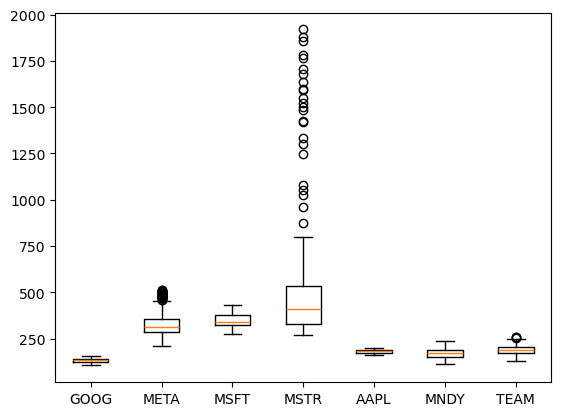

In [52]:
#Print box plot for each stock
data_boxplot = pd.DataFrame({"GOOG": GOOG_stock_df["close"],
                            "META": META_stock_df["close"],
                            "MSFT": MSFT_stock_df["close"],
                            "MSTR": MSTR_stock_df["close"],
                            "AAPL": AAPL_stock_df["close"],
                            "MNDY": MNDY_stock_df["close"],
                            "TEAM":TEAM_stock_df["close"]})

fig, ax = plt.subplots()
ax.boxplot(data_boxplot)
ax.set_xticklabels(data_boxplot.keys())


'''print(data_boxplot)
plt.boxplot(data_boxplot)
ax.set_xticklabels(data_boxplot.keys())

plt.xticks(np.arange(7), ['GOOG', 'META', 'MSFT','MSTR', 'AAPL', 'MNDY', 'TEAM'])
ax.set_xticklabels(my_dict.keys())'''

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

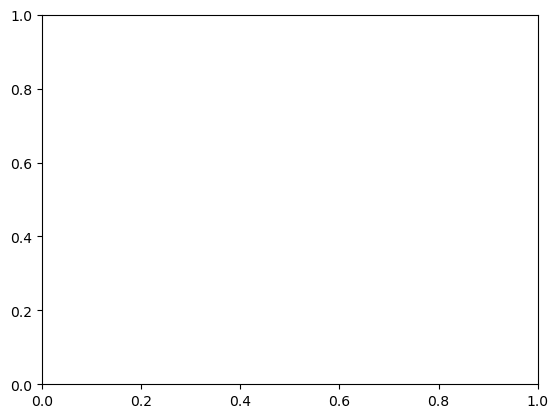

In [53]:
#Remove MSTR to better visualise data
fig, ax = plt.subplots()
ax.boxplot(data_boxplot["GOOG"], data_boxplot["META"])


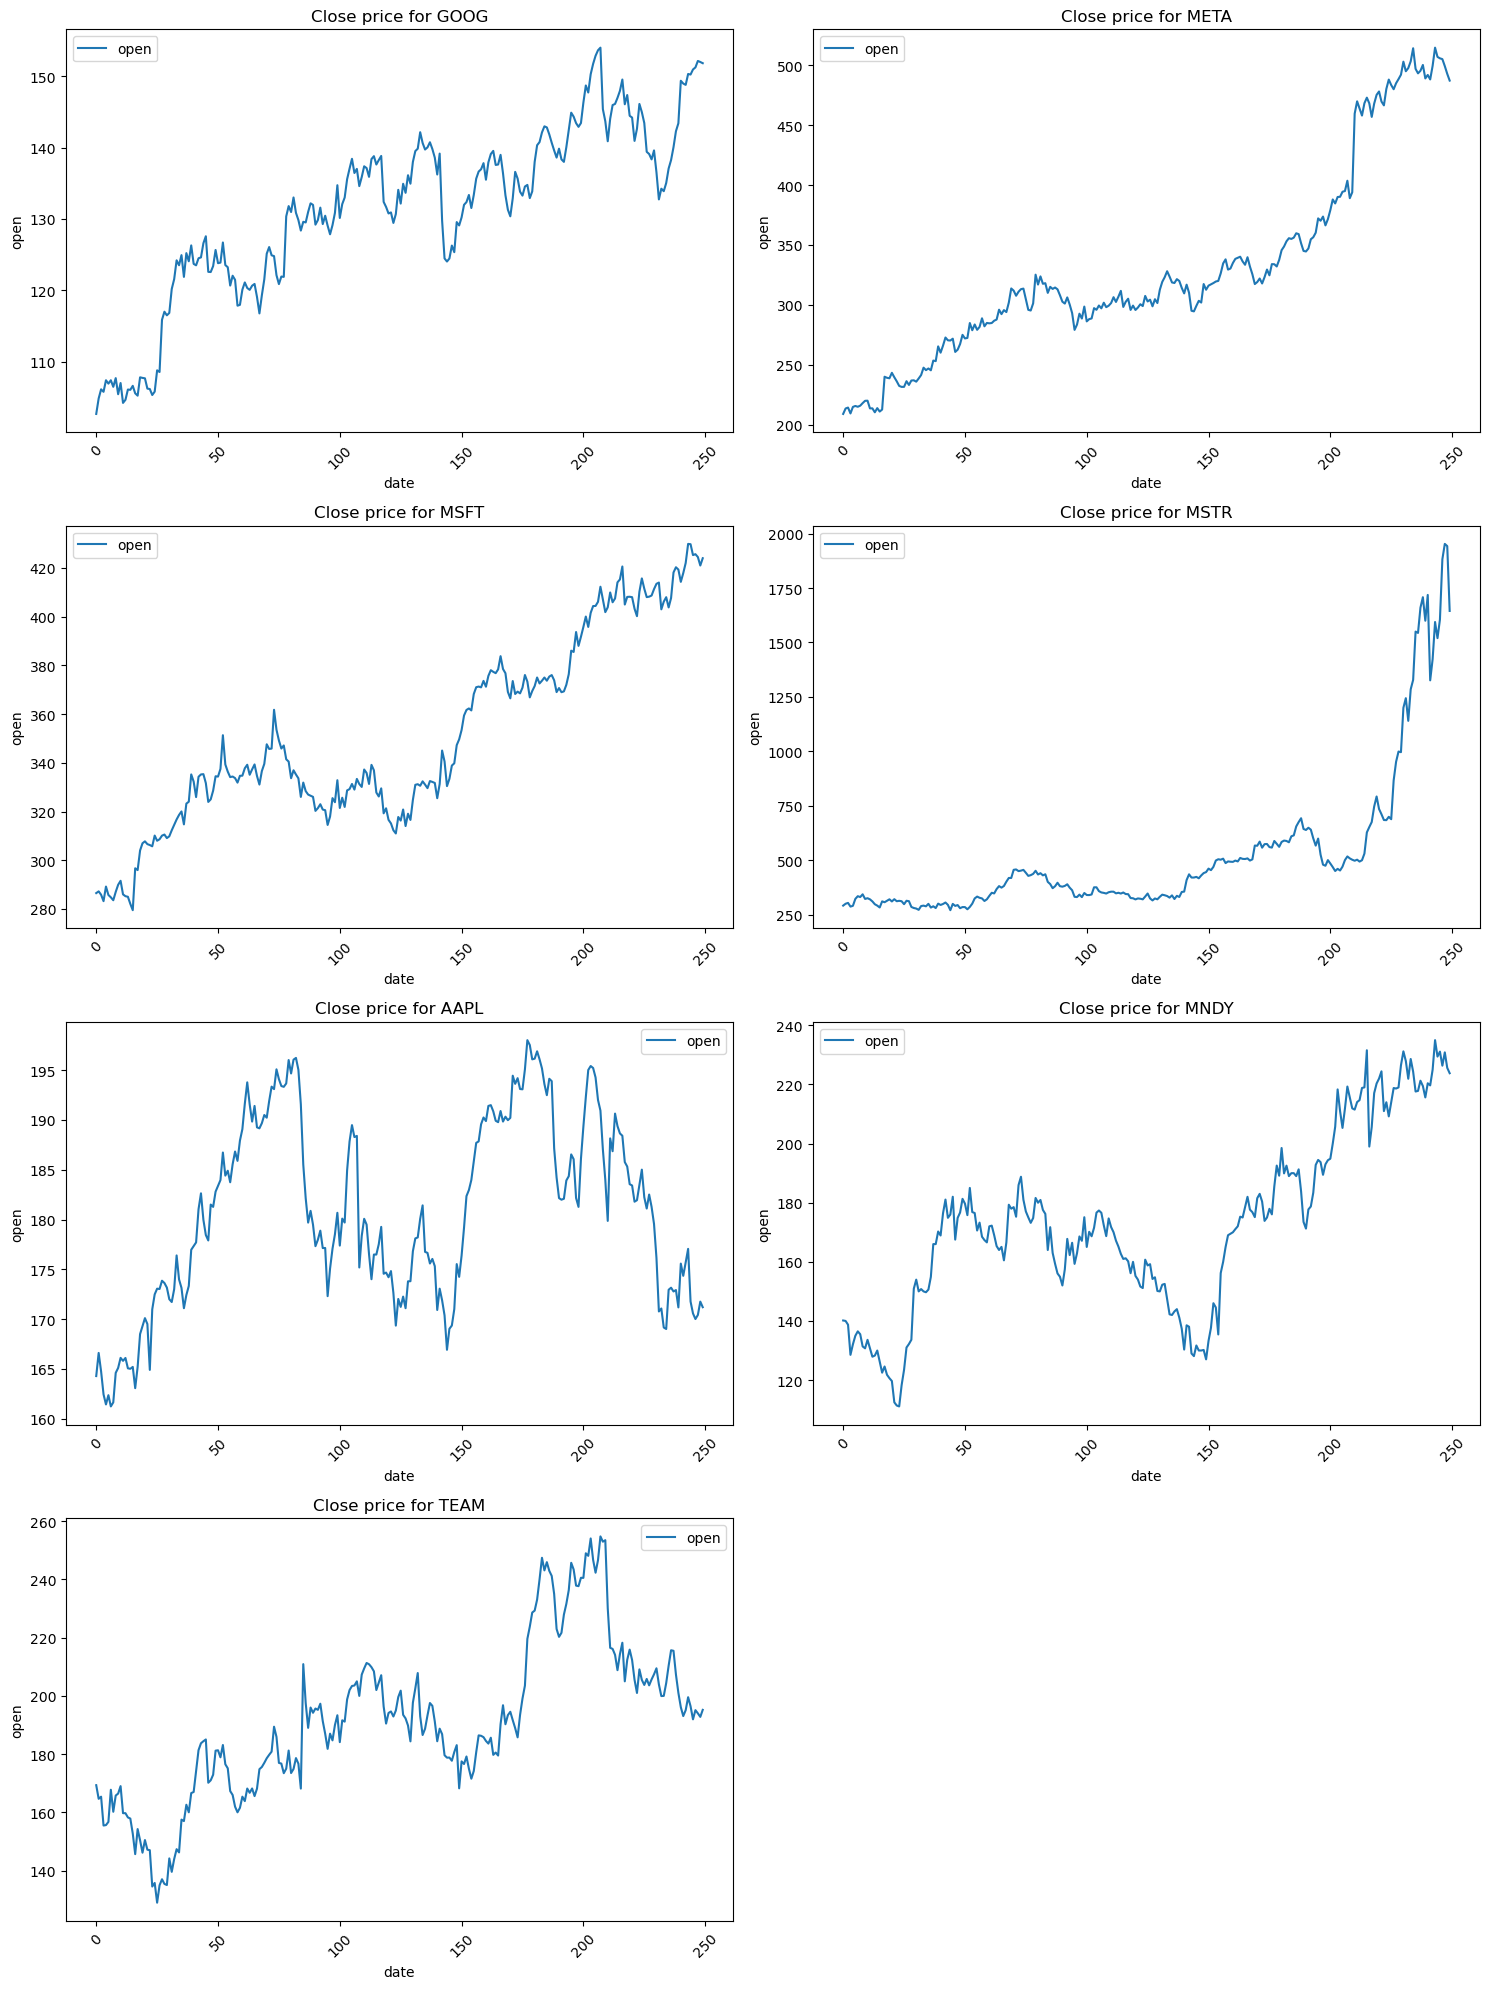

In [10]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    company['open'].plot()
    plt.ylabel('open')
    plt.xlabel('date')
    plt.title(f"Close price for {company_name[i - 1]}")
    plt.legend()
    plt.xticks(rotation=45)
    
plt.tight_layout()

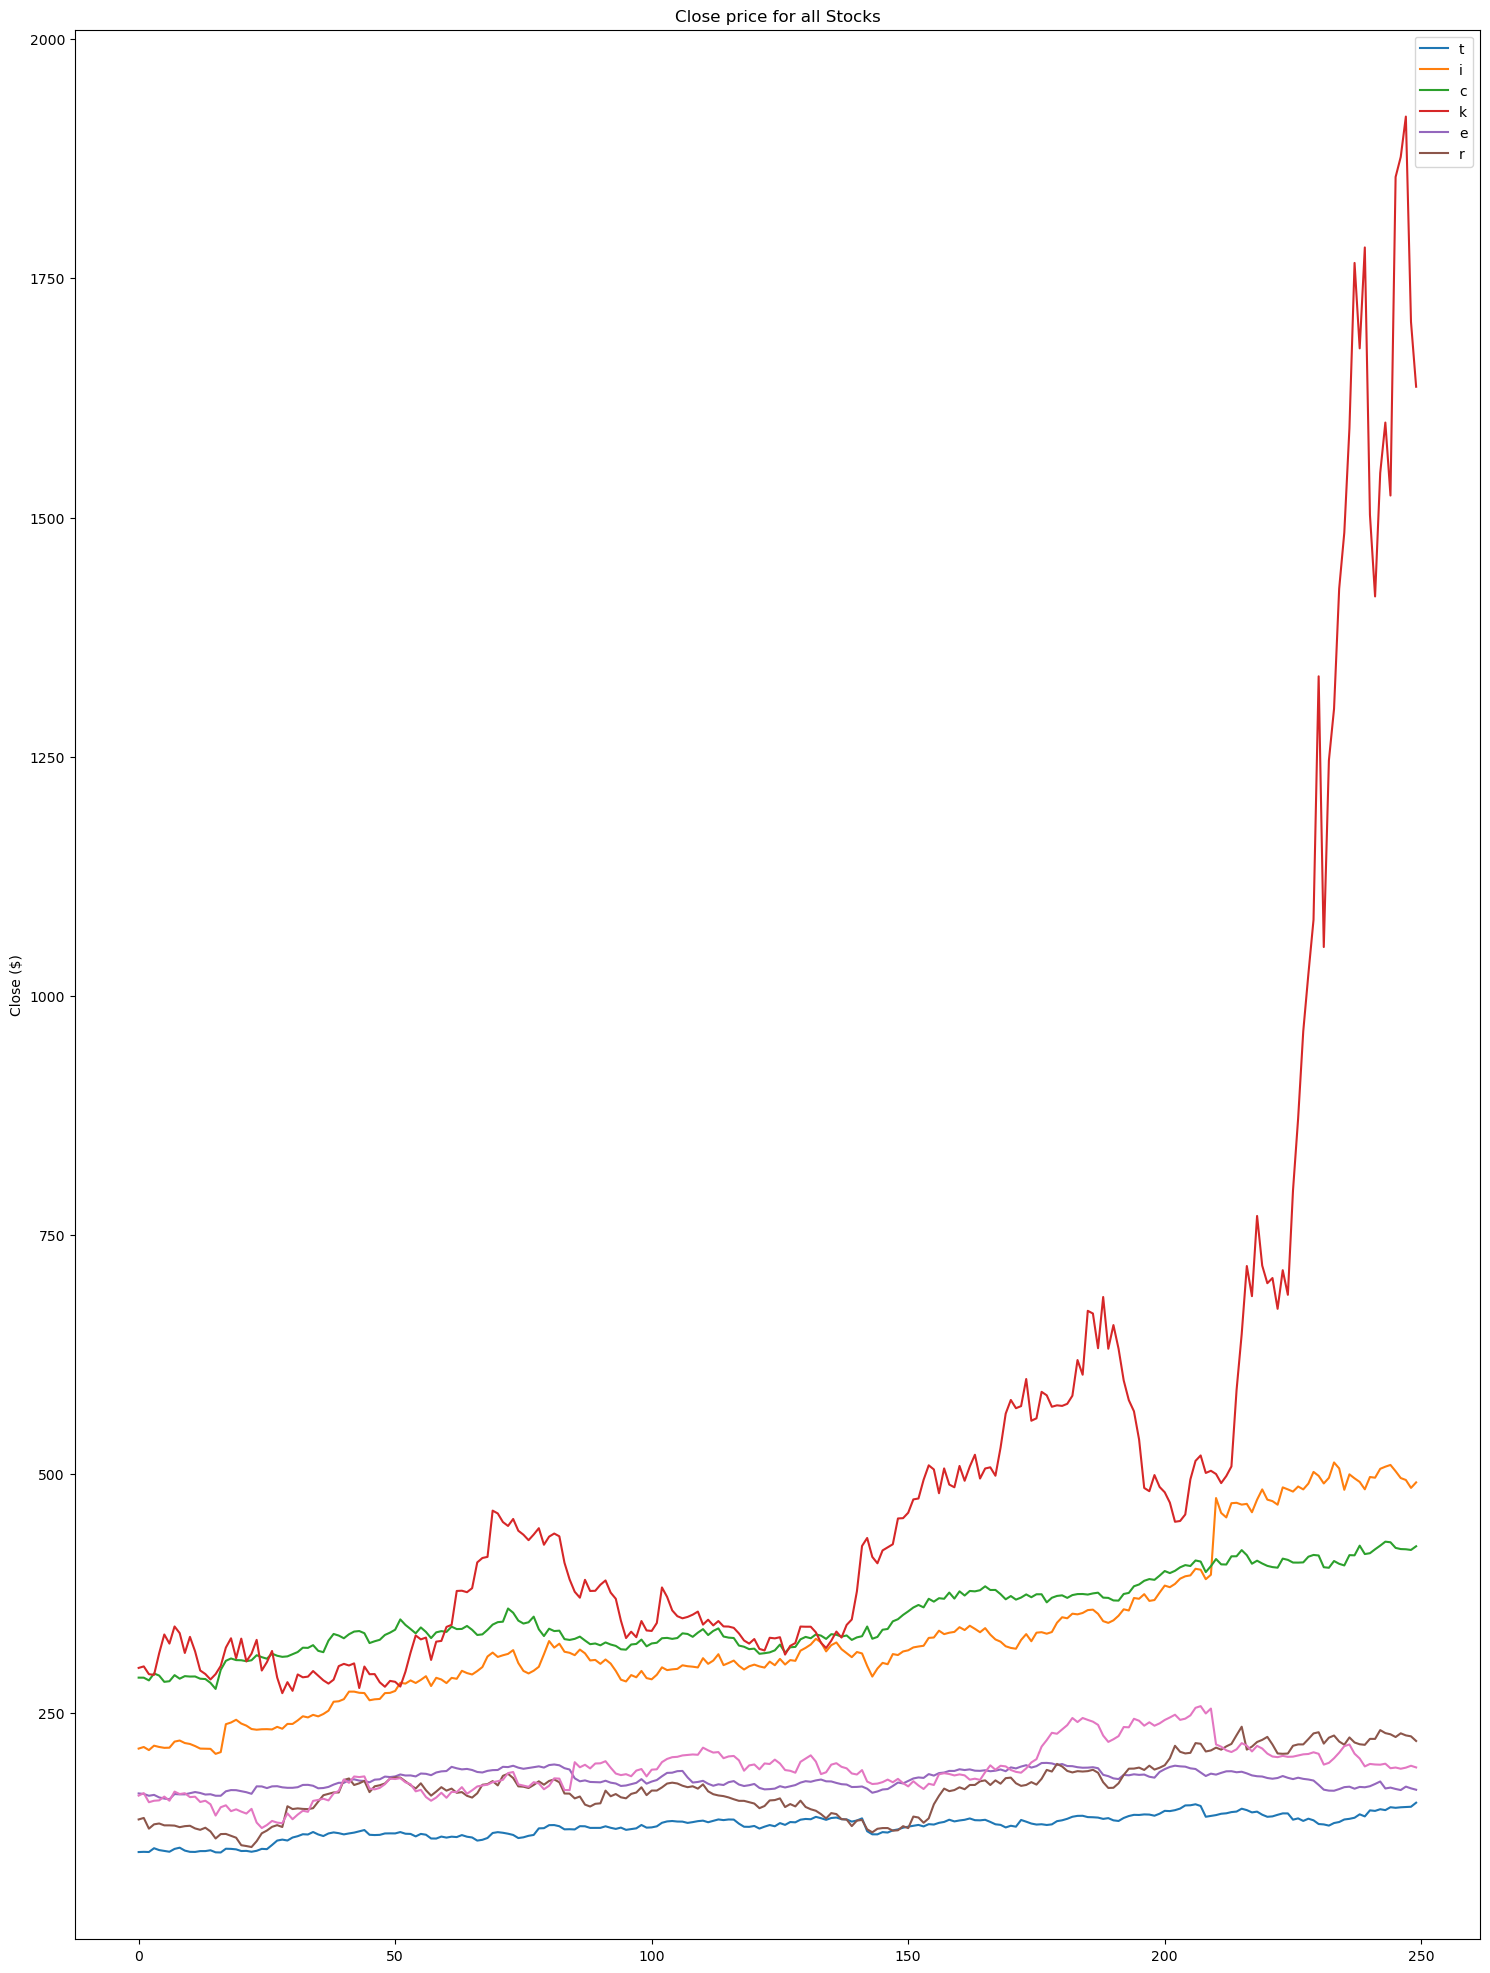

In [11]:
# Let's see a historical view of the closing price on single chart
plt.figure(figsize=(15, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    company['close'].plot()
    plt.ylabel('Close ($)')
    plt.title(f"Close price for all Stocks")
    plt.legend('ticker')
    
plt.tight_layout()

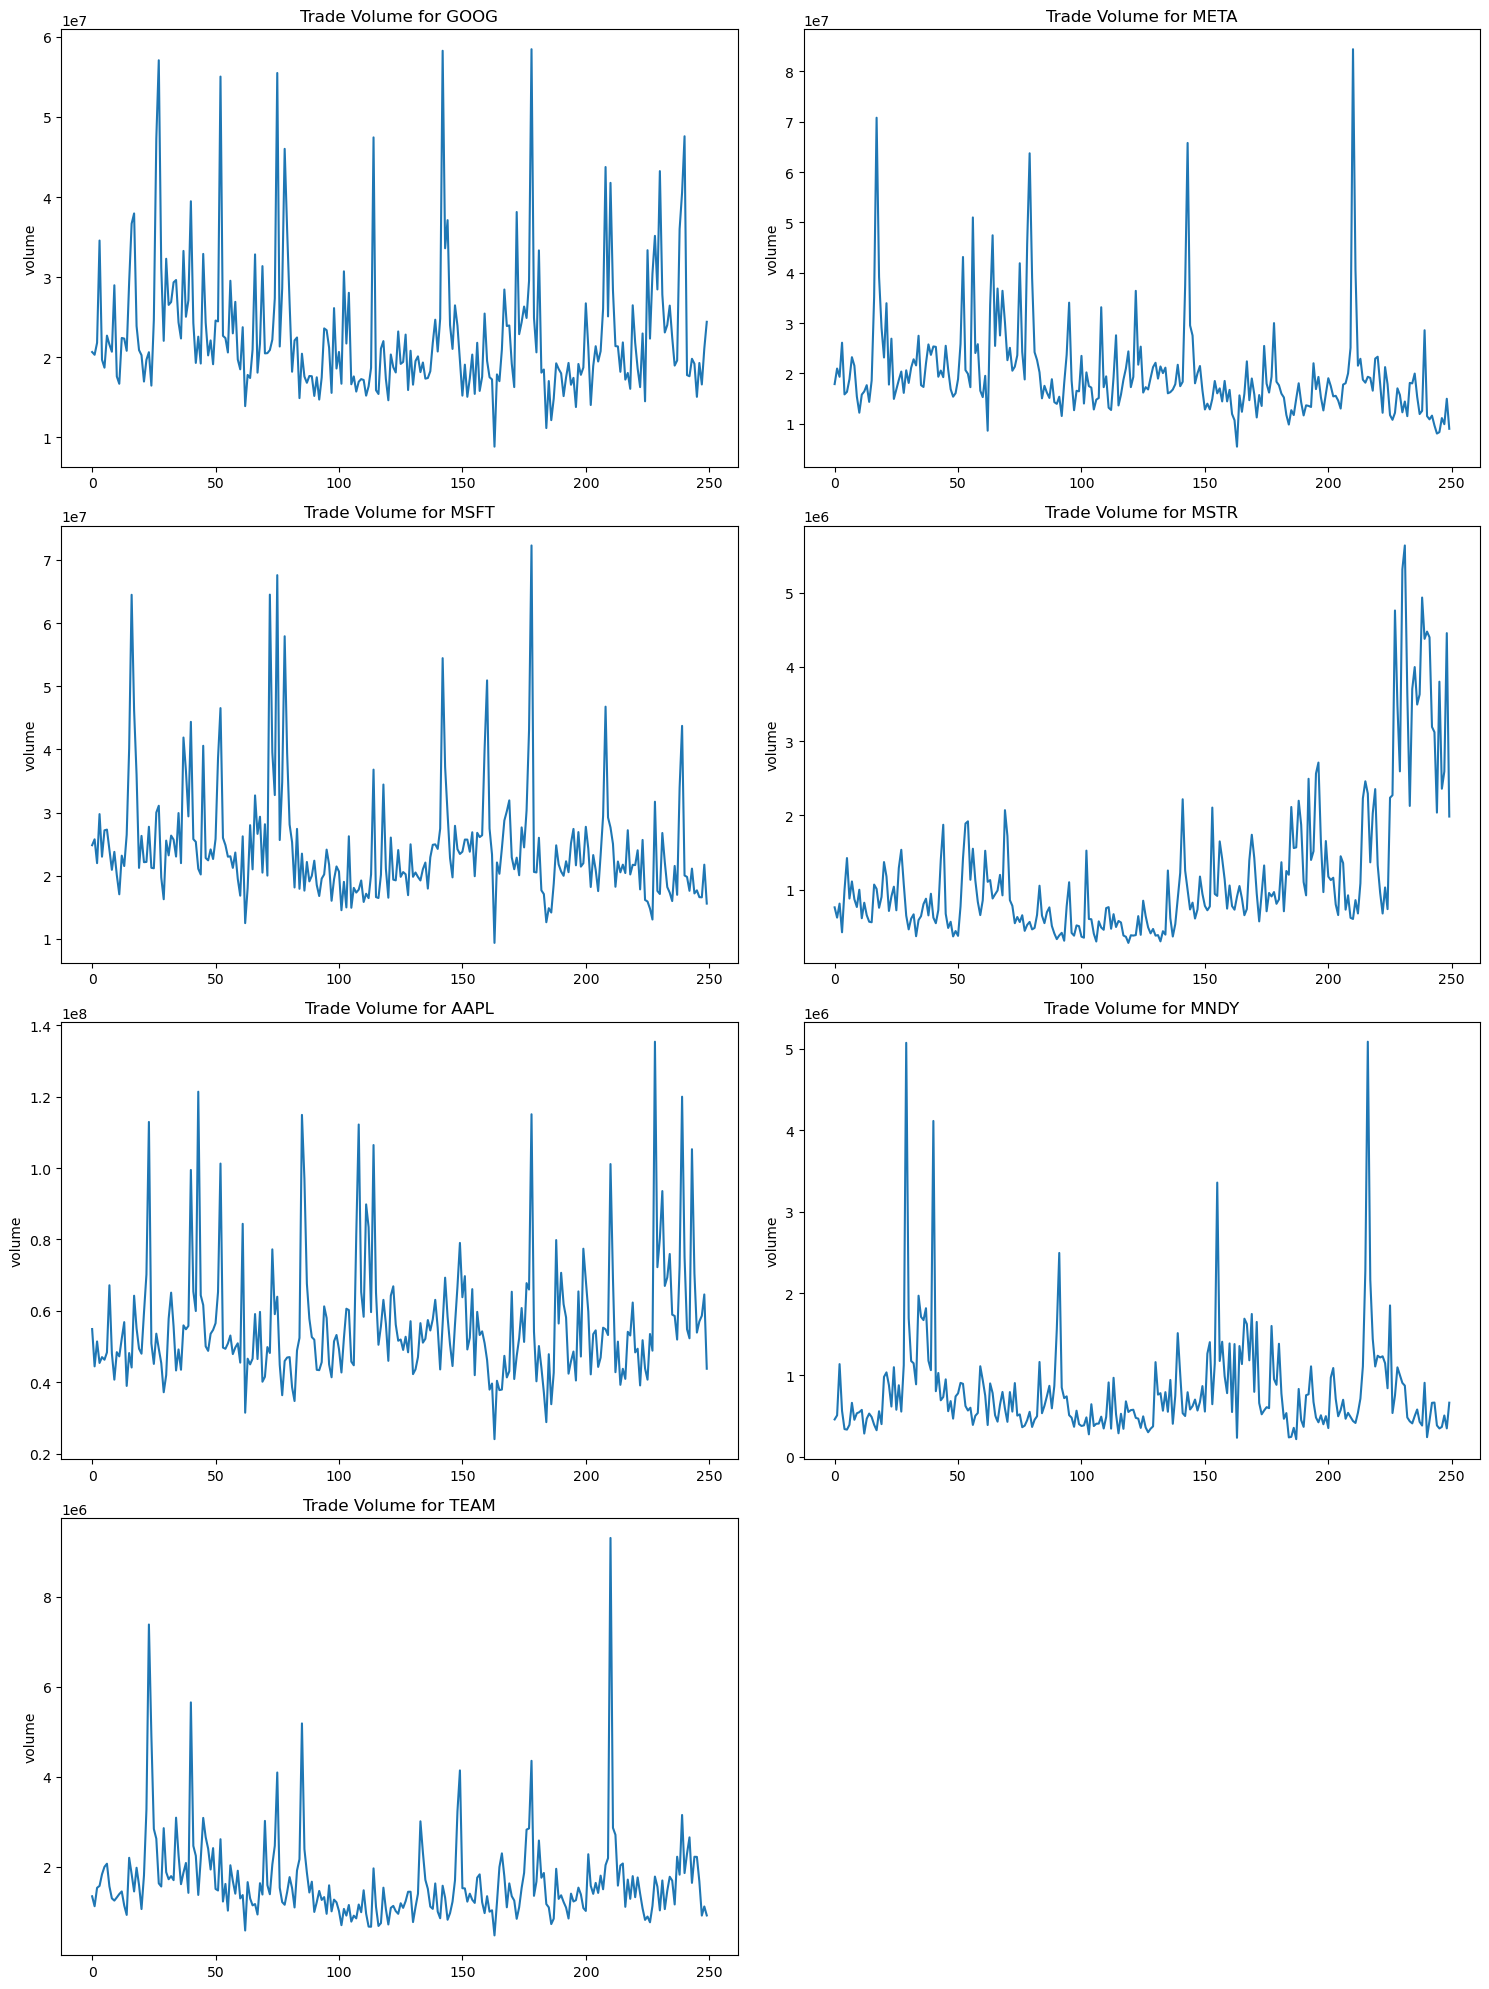

In [15]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    company['volume'].plot()
    plt.ylabel('volume')
    plt.xlabel(None)
    plt.title(f"Trade Volume for {company_name[i - 1]}")
    
plt.tight_layout()

In [ ]:
#Create data frame for each Ticker for % Change, 
GOOG_close_change = GOOG_data.groupby(['ticker'])['open'].pct_change(-1)
GOOG_close_change.head()

In [ ]:
percentage_change = ((values[1:] - values[:-1]) / values[:-1]) * 100

## Analysis Part II: Building interactivity to our data

In [ ]:
# Collects the user's input for the prompt "What Stock should we search for?"
# name = input("What Stock should we search for? ")
# date = input("What search start date should we use ?")


#Which stock had the highest value in the past year?
#Which stock had the most movement in the past year? (max std dev?)

